# Introducing Problem

# **The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems.**

** 
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


**
The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

**

# Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
#Importing model encode for text into int
from sklearn.preprocessing import LabelEncoder
# Importing libraries for metrics evaluations
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#importing libraries for train ans test split
from sklearn.cross_validation import train_test_split
# import classification modules of machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Loading Data

In [55]:
train=pd.read_csv("iris.csv")
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
train.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Exploring Data

In [57]:
print(train.shape)

(150, 6)


In [58]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None


In [59]:
#we saw there was not missing values in datasets but we can check it as
train.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [60]:
#Description of data
train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [61]:
# We can drop ID column
train=train.drop('Id',axis=1)
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
train['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Visualization

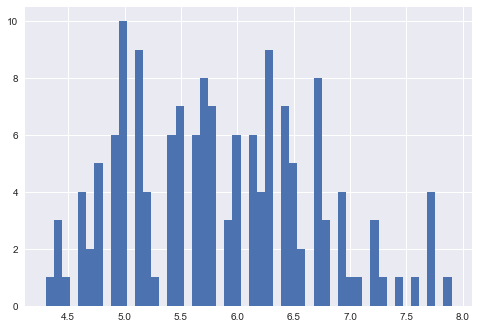

In [63]:
train['SepalLengthCm'].hist(bins=50)
plt.show()

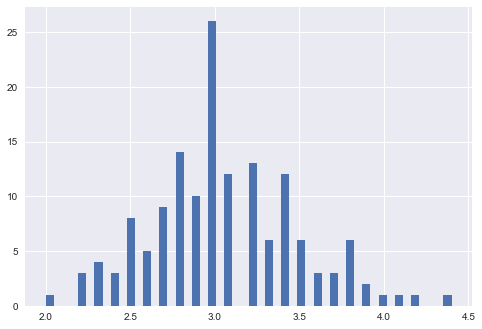

In [64]:
train['SepalWidthCm'].hist(bins=50)
plt.show()

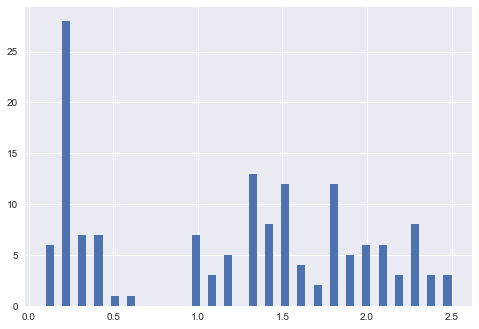

In [65]:
train['PetalWidthCm'].hist(bins=50)
plt.show()

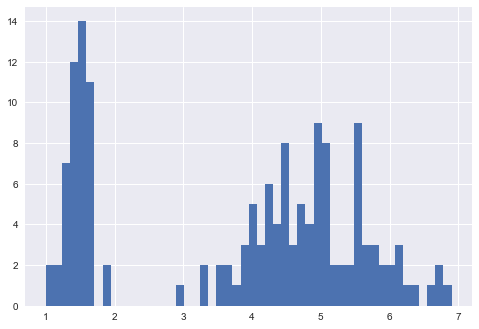

In [66]:
train['PetalLengthCm'].hist(bins=50)
plt.show()

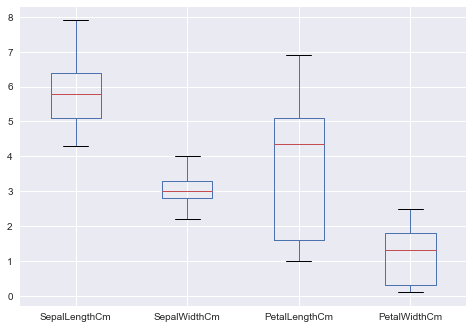

In [68]:
train.boxplot()
plt.show()

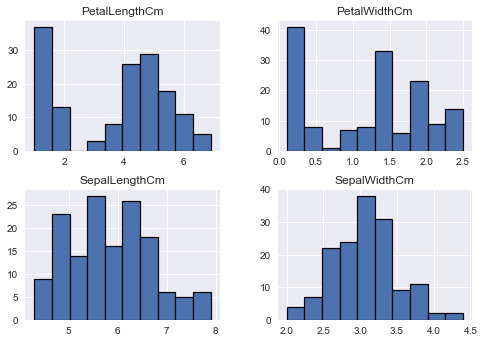

In [69]:
# We can also visualize histogram 
train.hist(edgecolor='black', linewidth=1.2)
plt.show()

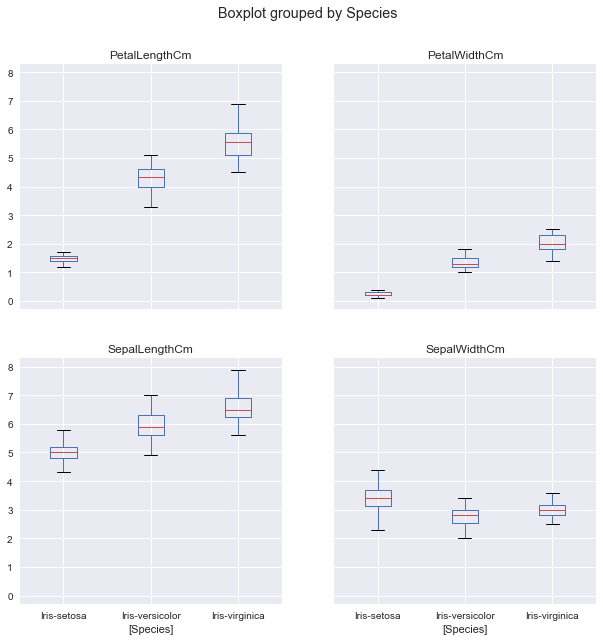

In [70]:
# boxplot on each feature by species
train.boxplot(by="Species",figsize=(10,10))
plt.show()

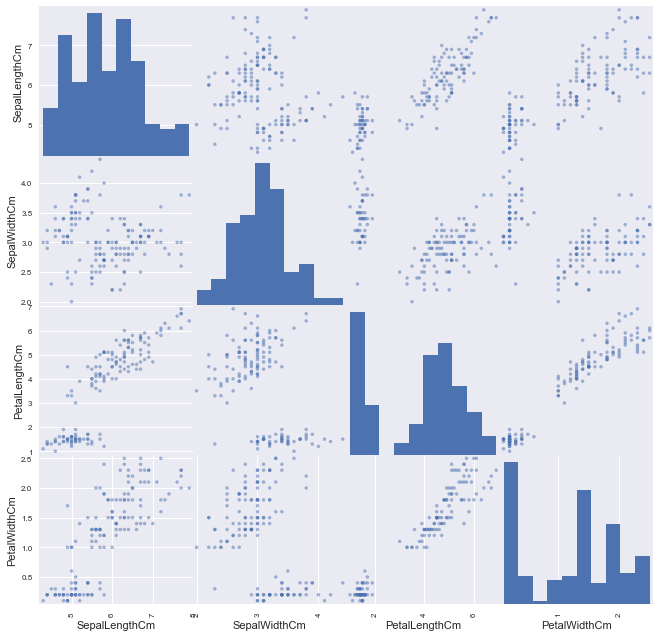

In [71]:
# scatter plot matrix
scatter_matrix(train,figsize=(11,11))
plt.show()

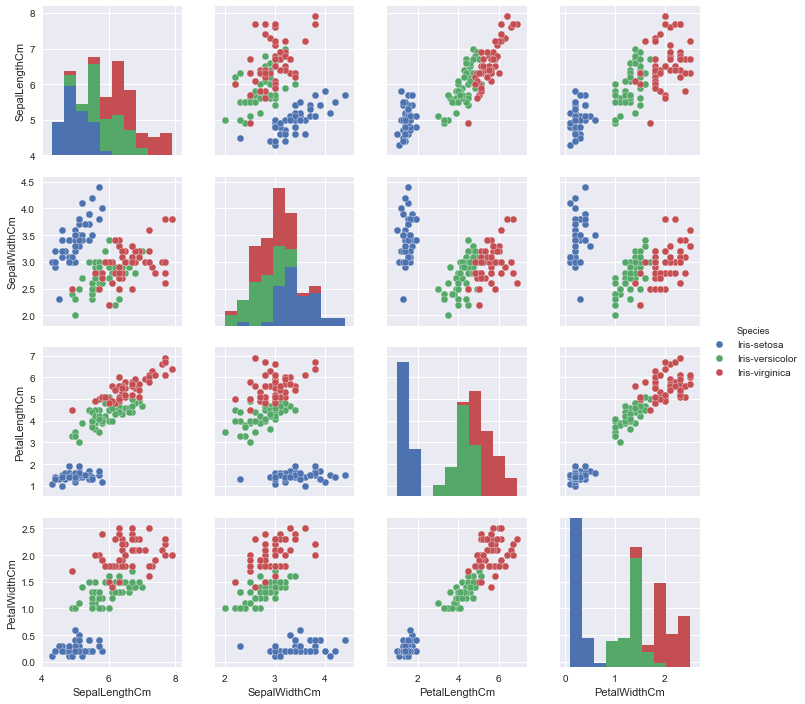

In [72]:
sns.pairplot(train,hue="Species")
plt.show()

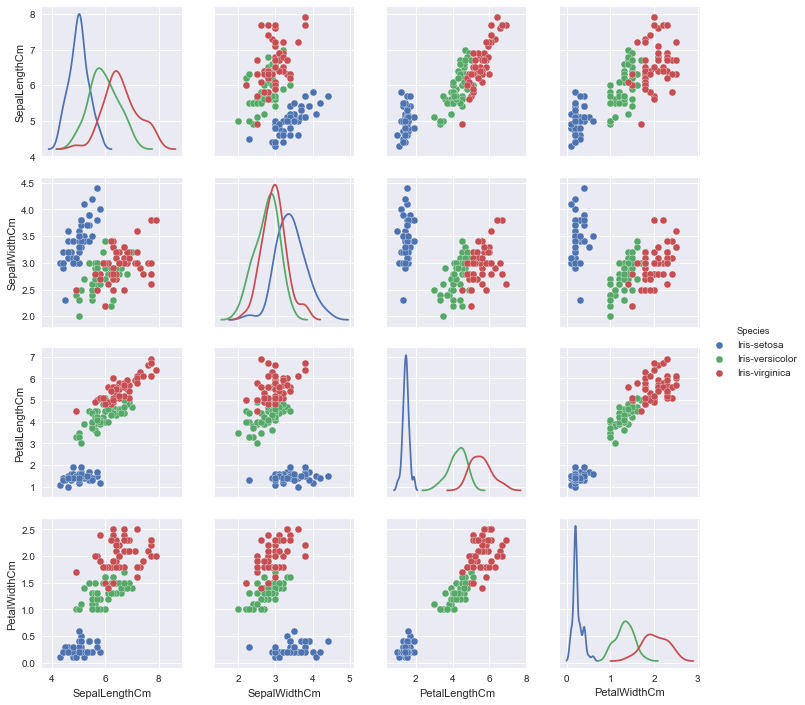

In [73]:
sns.pairplot(train, hue="Species",diag_kind="kde")
plt.show()

In [74]:
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
X=train.iloc[:,0:4].values
y=train.iloc[:,-1].values

In [90]:
le=LabelEncoder()
y = le.fit_transform(train.iloc[:,-1].values)

In [91]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(x_test)

In [93]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.72      0.84        18
          2       0.69      1.00      0.81        11

avg / total       0.92      0.89      0.89        45



In [94]:
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.888888888889


In [95]:
print("confusion matrix",confusion_matrix(y_pred,y_test))

confusion matrix [[16  0  0]
 [ 0 13  0]
 [ 0  5 11]]


In [99]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_predc=nb.predict(x_test)
y_predc

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0], dtype=int64)

In [100]:
print('accuracy is',accuracy_score(y_predc,y_test))

accuracy is 1.0


In [101]:
print(classification_report(y_test, y_predc))
print(confusion_matrix(y_test, y_predc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      1.00      1.00        18
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


In [102]:
svm=SVC()
svm.fit(X_train,y_train)
y_predicsvc=svm.predict(x_test)
y_predicsvc

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0], dtype=int64)

In [106]:
print(classification_report(y_test, y_predicsvc))
print(confusion_matrix(y_test, y_predicsvc))
print("accuracy is",accuracy_score(y_predicsvc,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.977777777778


In [116]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predicknn=knn.predict(x_test)
y_predicknn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0], dtype=int64)

In [117]:
print(classification_report(y_test, y_predicknn))
print(confusion_matrix(y_test, y_predicknn))
print("accuracy is",accuracy_score(y_predicknn,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.977777777778


In [118]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_predictree=tree.predict(x_test)
y_predictree

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0], dtype=int64)

In [119]:
print(classification_report(y_test, y_predictree))
print(confusion_matrix(y_test, y_predictree))
print("accuracy is",accuracy_score(y_predictree,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.977777777778


In [120]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
y_predicforest=forest.predict(x_test)
y_predicforest

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0], dtype=int64)

In [121]:
print(classification_report(y_test, y_predicforest))
print(confusion_matrix(y_test, y_predicforest))
print("accuracy is",accuracy_score(y_predicforest,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.94      0.94      0.94        18
          2       0.91      0.91      0.91        11

avg / total       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
accuracy is 0.955555555556
